<a href="https://colab.research.google.com/github/Drankenstain/Data_Analytics/blob/main/DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-learn-extra


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.3 MB/s eta 0:00:00


Mounted at /content/drive


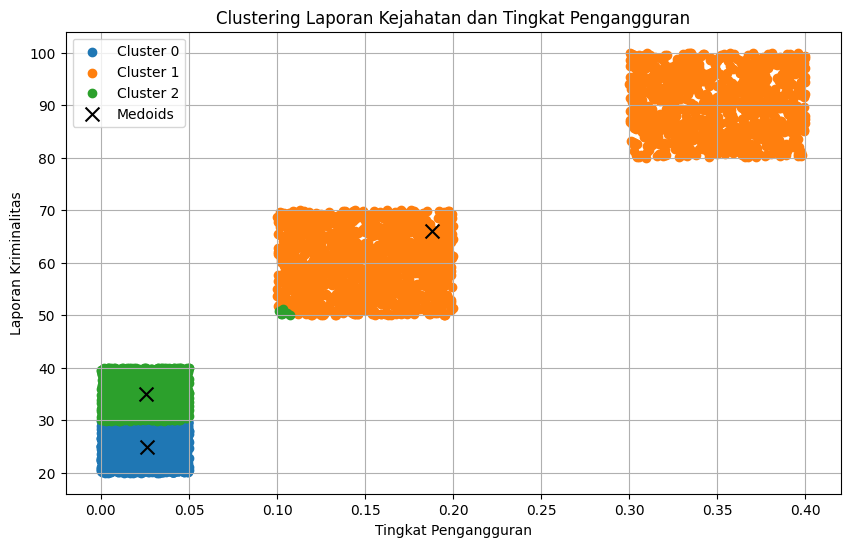

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Data Mining/Data source.csv'


data = pd.read_csv(file_path)

selected_columns = data[['tingkat_pengangguran', 'laporan_kriminalitas']]

scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(selected_columns)

kmedoids = KMedoids(n_clusters=3, random_state=42)
kmedoids.fit(data_normalized)

data['Cluster'] = kmedoids.labels_

plt.figure(figsize=(10, 6))
for cluster in set(kmedoids.labels_):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(
        cluster_data['tingkat_pengangguran'],
        cluster_data['laporan_kriminalitas'],
        label=f'Cluster {cluster}'
    )

medoids = scaler.inverse_transform(kmedoids.cluster_centers_)
plt.scatter(
    medoids[:, 0], medoids[:, 1],
    color='black', marker='x', s=100, label='Medoids'
)

plt.title('Clustering Laporan Kejahatan dan Tingkat Pengangguran')
plt.xlabel('Tingkat Pengangguran')
plt.ylabel('Laporan Kriminalitas')
plt.legend()
plt.grid()
plt.show()

output_path = 'clustered_data.csv'
data.to_csv(output_path, index=False)

files.download(output_path)

# TESTING KMedoids with kauffman

In [ ]:
import chardet
import pandas as pd

with open("Data_source.csv", "rb") as f:
    result = chardet.detect(f.read())
    print(result)

df = pd.read_csv("Data_source.csv", encoding=result['encoding'])

{'encoding': 'UTF-8-SIG', 'confidence': 1.0, 'language': ''}


In [ ]:
print(df.dtypes)

id                                  int64
kode_provinsi                       int64
nama_provinsi                      object
bps_kode_kabupaten_kota             int64
bps_nama_kabupaten_kota            object
bps_kode_kecamatan                  int64
bps_nama_kecamatan                 object
bps_kode_desa_kelurahan             int64
bps_nama_desa_kelurahan            object
kemendagri_kode_kecamatan          object
kemendagri_nama_kecamatan          object
kemendagri_kode_desa_kelurahan     object
kemendagri_nama_desa_kelurahan     object
jumlah_penduduk                     int64
satuan                             object
tahun                               int64
rata_rata_pendapatan                int64
class                              object
tingkat_kelulusan_sma             float64
tingkat_kelulusan_smp             float64
tingkat_kelulusan_sd              float64
laporan_kriminalitas                int64
tingkat_pengangguran              float64
tingkat_kepemilikan_mobil         

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("Data_source.csv")

selected_columns = ["tingkat_pengangguran", "laporan_kriminalitas", "tingkat_kelulusan_sma"]
data = df[selected_columns].dropna()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled_df = pd.DataFrame(data_scaled, columns=selected_columns)
print(data_scaled_df.describe())

       tingkat_pengangguran  laporan_kriminalitas  tingkat_kelulusan_sma
count          5.957000e+03          5.957000e+03           5.957000e+03
mean           1.037724e-16          1.383632e-16          -1.121219e-16
std            1.000084e+00          1.000084e+00           1.000084e+00
min           -8.591813e-01         -1.119973e+00          -2.112445e+00
25%           -6.915616e-01         -7.748354e-01          -7.882931e-01
50%           -5.239418e-01         -4.296981e-01           1.173296e-01
75%            4.482527e-01          6.919984e-01           8.342788e-01
max            2.493213e+00          2.331401e+00           1.588901e+00


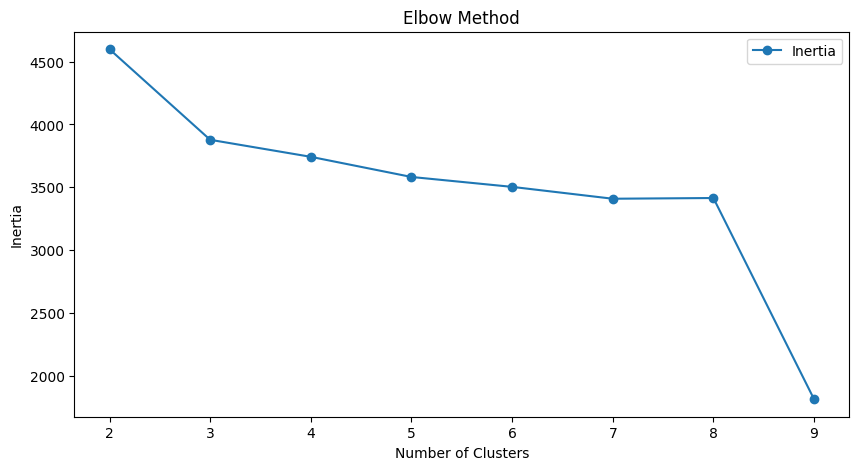

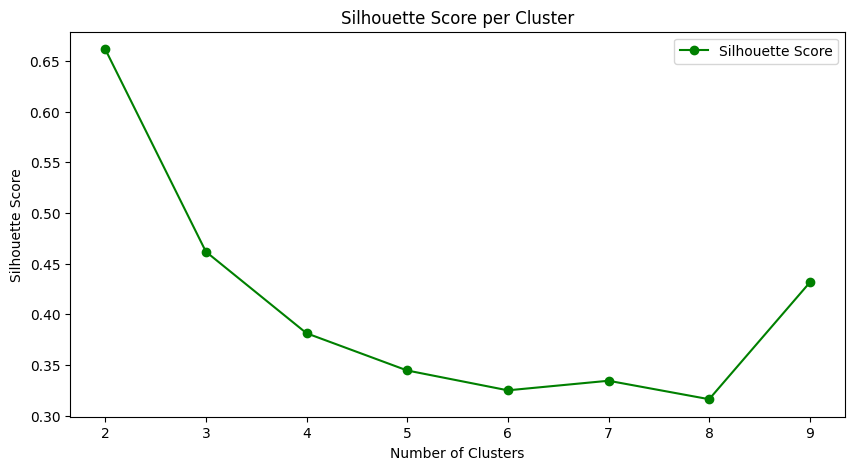

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt

inertia = []
silhouette_scores = []
k_range = range(2, 10)

for k in k_range:
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    kmedoids.fit(data_scaled)
    inertia.append(kmedoids.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmedoids.labels_))

plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia, marker='o', label='Inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o', color='green', label='Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score per Cluster')
plt.legend()
plt.show()

In [ ]:
best_k = 3

kmedoids = KMedoids(n_clusters=best_k, random_state=42)
kmedoids.fit(data_scaled)

df['Cluster'] = kmedoids.labels_

print(df.head())

   id  kode_provinsi nama_provinsi  bps_kode_kabupaten_kota  \
0   1             32    JAWA BARAT                     3201   
1   2             32    JAWA BARAT                     3201   
2   3             32    JAWA BARAT                     3201   
3   4             32    JAWA BARAT                     3201   
4   5             32    JAWA BARAT                     3201   

  bps_nama_kabupaten_kota  bps_kode_kecamatan bps_nama_kecamatan  \
0         KABUPATEN BOGOR             3201010           NANGGUNG   
1         KABUPATEN BOGOR             3201010           NANGGUNG   
2         KABUPATEN BOGOR             3201010           NANGGUNG   
3         KABUPATEN BOGOR             3201010           NANGGUNG   
4         KABUPATEN BOGOR             3201010           NANGGUNG   

   bps_kode_desa_kelurahan bps_nama_desa_kelurahan kemendagri_kode_kecamatan  \
0               3201010001                MALASARI                  32.01.21   
1               3201010002            BANTAR KARET  

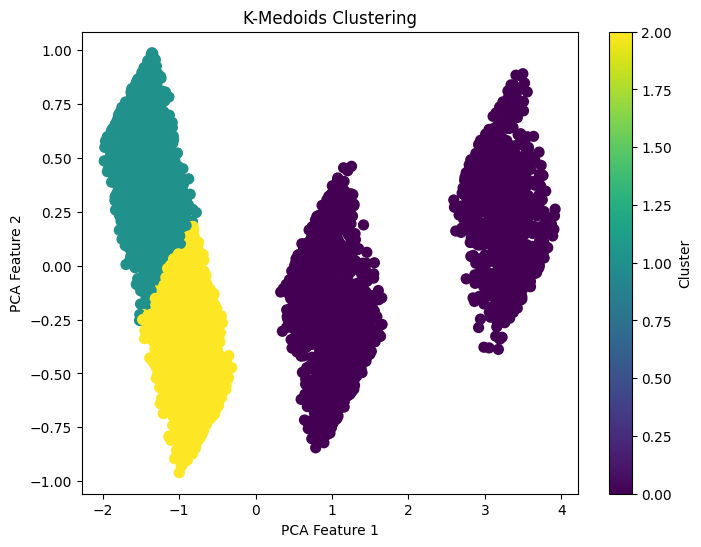

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmedoids.labels_, cmap='viridis', s=50)
plt.title('K-Medoids Clustering')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(data_scaled, df['Cluster'])
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.4617718103040413


Coba pakai Kaufman Initialization buat bisa tentuin medoid awal baru dioper ke K-Medoids

Indeks medoid terpilih: [233, 128, 178]


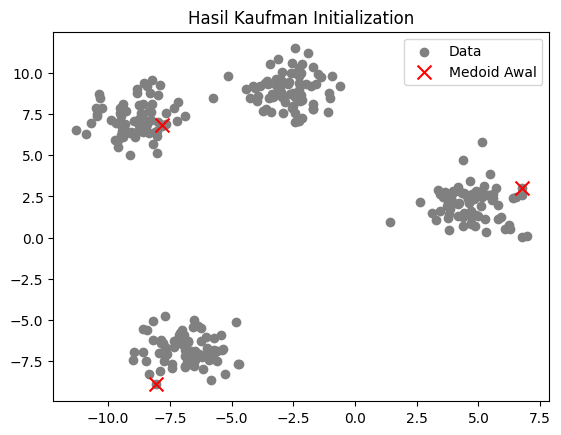

In [ ]:
import numpy as np
from sklearn.metrics import pairwise_distances

def kaufman_initialization(X, n_clusters):
    medoid_indices = [np.random.choice(X.shape[0])]

    for _ in range(1, n_clusters):
        distances = pairwise_distances(X, X[medoid_indices], metric='euclidean')
        min_distances = distances.min(axis=1)

        probabilities = min_distances / min_distances.sum()
        next_medoid = np.random.choice(X.shape[0], p=probabilities)
        medoid_indices.append(next_medoid)

    return medoid_indices

from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

n_clusters = 3
medoid_indices = kaufman_initialization(X, n_clusters)

print("Indeks medoid terpilih:", medoid_indices)

plt.scatter(X[:, 0], X[:, 1], c='gray', label='Data')
plt.scatter(X[medoid_indices, 0], X[medoid_indices, 1], c='red', marker='x', s=100, label='Medoid Awal')
plt.legend()
plt.title("Hasil Kaufman Initialization")
plt.show()


In [ ]:
from sklearn_extra.cluster import KMedoids
import numpy as np

n_clusters = 3
kmedoids = KMedoids(n_clusters=n_clusters, init='random', random_state=42)
kmedoids.cluster_centers_ = X[medoid_indices]

kmedoids.fit(X)

KMedoids(init='random', n_clusters=3, random_state=42)

Medoid Akhir: [ 63 121 237]
Label Cluster: [0 0 0 1 0 1 2 1 0 2 0 2 0 0 0 0 0 2 0 0 2 0 1 0 0 0 0 1 1 2 0 2 0 2 0 0 0
 1 0 1 2 0 0 1 0 0 0 2 0 2 1 0 1 0 1 2 0 2 2 0 0 2 2 0 1 1 1 1 1 0 1 1 0 2
 0 0 1 1 0 1 0 0 0 0 1 0 0 2 2 2 0 0 0 0 0 0 1 0 0 0 2 2 2 0 0 0 0 0 1 0 2
 0 0 0 0 2 0 1 0 1 1 1 0 0 1 0 0 0 0 1 2 0 0 0 0 2 2 0 0 1 0 2 1 0 2 2 2 2
 1 0 0 0 2 1 0 2 1 0 0 2 0 0 1 0 2 0 1 0 0 0 0 0 1 2 2 1 1 2 2 1 0 0 0 2 2
 0 1 0 2 2 1 1 1 0 2 1 1 2 2 0 0 0 1 2 0 1 1 0 1 0 0 1 1 2 0 1 0 0 0 0 0 1
 0 1 2 2 0 0 2 2 2 0 0 1 2 1 0 2 0 0 0 1 1 2 0 1 1 1 0 1 0 1 0 2 1 0 2 0 0
 0 2 0 0 0 1 2 1 2 2 0 0 1 2 2 0 0 1 0 0 2 2 2 2 1 0 2 1 2 2 1 0 1 2 0 0 0
 2 0 0 0]


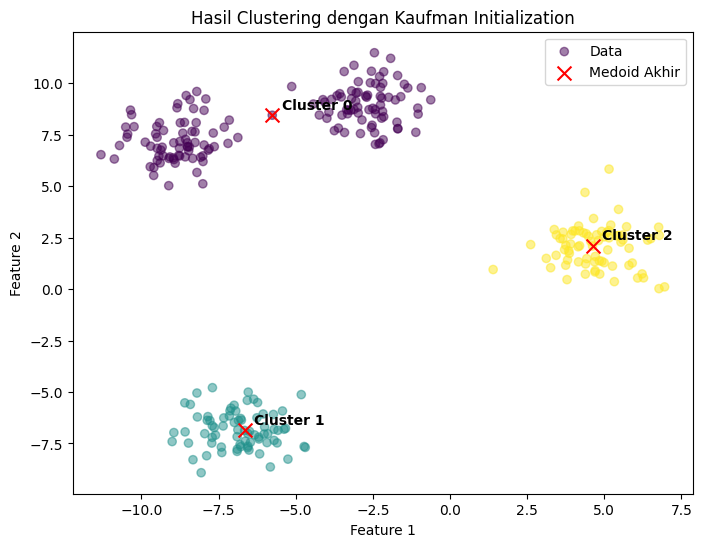

In [ ]:
n_clusters = 3

kmedoids = KMedoids(n_clusters=n_clusters, init='random', random_state=42, metric='euclidean')
kmedoids.fit(X)

medoid_indices = kmedoids.medoid_indices_
labels = kmedoids.labels_

print("Medoid Akhir:", medoid_indices)
print("Label Cluster:", labels)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', alpha=0.5, label='Data')
plt.scatter(X[medoid_indices, 0], X[medoid_indices, 1], c='red', marker='x', s=100, label='Medoid Akhir')

for i, medoid_index in enumerate(medoid_indices):
    plt.text(X[medoid_index, 0] + 0.3,
             X[medoid_index, 1] + 0.3,
             f"Cluster {i}",
             color='black', fontsize=10, weight='bold')

plt.legend()
plt.title("Hasil Clustering dengan Kaufman Initialization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
silhouette = silhouette_score(X, kmedoids.labels_)
print("Silhouette Score:", silhouette)

Silhouette Score: 0.7569108532473462


In [ ]:
cols = ["tingkat_pengangguran", "laporan_kriminalitas", "tingkat_kelulusan_sma"]
X = df[cols].values

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(X_pca, columns=["Feature 1", "Feature 2"])
print(df_pca.head())

   Feature 1  Feature 2
0  21.040212  -0.006600
1  53.040604   0.061030
2  -6.960678   0.084954
3  48.040944  -0.021854
4  21.040374  -0.007569


In [ ]:
loading_scores = pd.DataFrame(pca.components_, columns=cols, index=["Feature 1", "Feature 2"])
print(loading_scores)

           tingkat_pengangguran  laporan_kriminalitas  tingkat_kelulusan_sma
Feature 1              0.004865               0.99998              -0.004007
Feature 2             -0.302020               0.00529               0.953287


<ipython-input-16-8582255194aa>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_analysis_pengangguran,


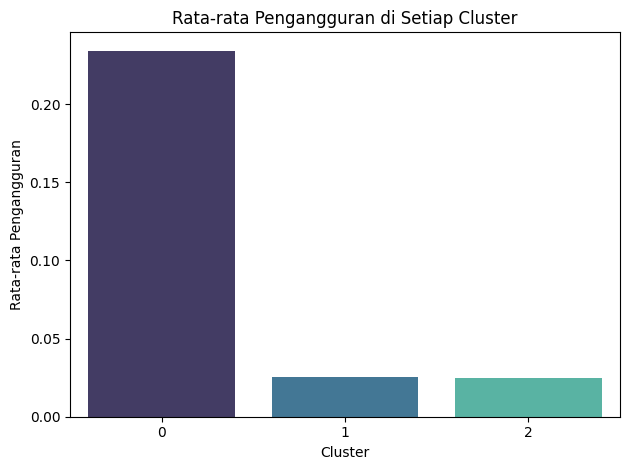

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cols_sosial = ["tingkat_pengangguran"]
cluster_analysis_pengangguran = df.groupby('Cluster')[cols_sosial].mean()

cluster_analysis_pengangguran = cluster_analysis_pengangguran.reset_index()

sns.barplot(data=cluster_analysis_pengangguran,
            x='Cluster', y='tingkat_pengangguran', palette='mako')

plt.title("Rata-rata Pengangguran di Setiap Cluster")
plt.ylabel("Rata-rata Pengangguran")
plt.xlabel("Cluster")
plt.tight_layout()
plt.show()


<ipython-input-17-d05422313594>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_analysis_kriminalitas,


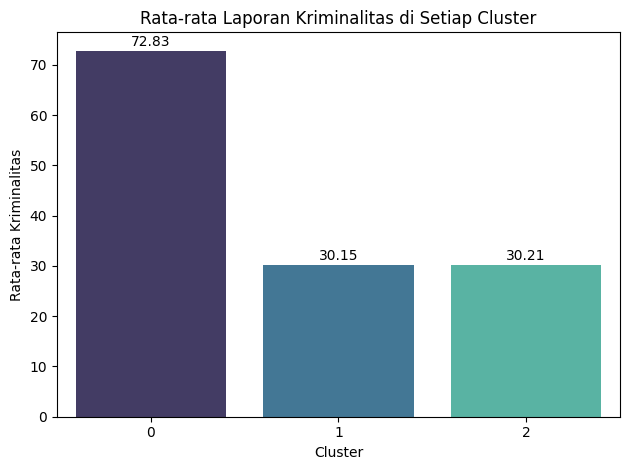

In [ ]:
cols_sosial = ["laporan_kriminalitas"]
cluster_analysis_kriminalitas = df.groupby('Cluster')[cols_sosial].mean()

cluster_analysis_kriminalitas = cluster_analysis_kriminalitas.reset_index()

sns.barplot(data=cluster_analysis_kriminalitas,
            x='Cluster', y='laporan_kriminalitas', palette='mako')

for i, row in cluster_analysis_kriminalitas.iterrows():
    plt.text(x=i,
             y=row['laporan_kriminalitas'] + 1,
             s=f"{row['laporan_kriminalitas']:.2f}",
             ha='center', color='black')

plt.title("Rata-rata Laporan Kriminalitas di Setiap Cluster")
plt.ylabel("Rata-rata Kriminalitas")
plt.xlabel("Cluster")
plt.tight_layout()
plt.show()


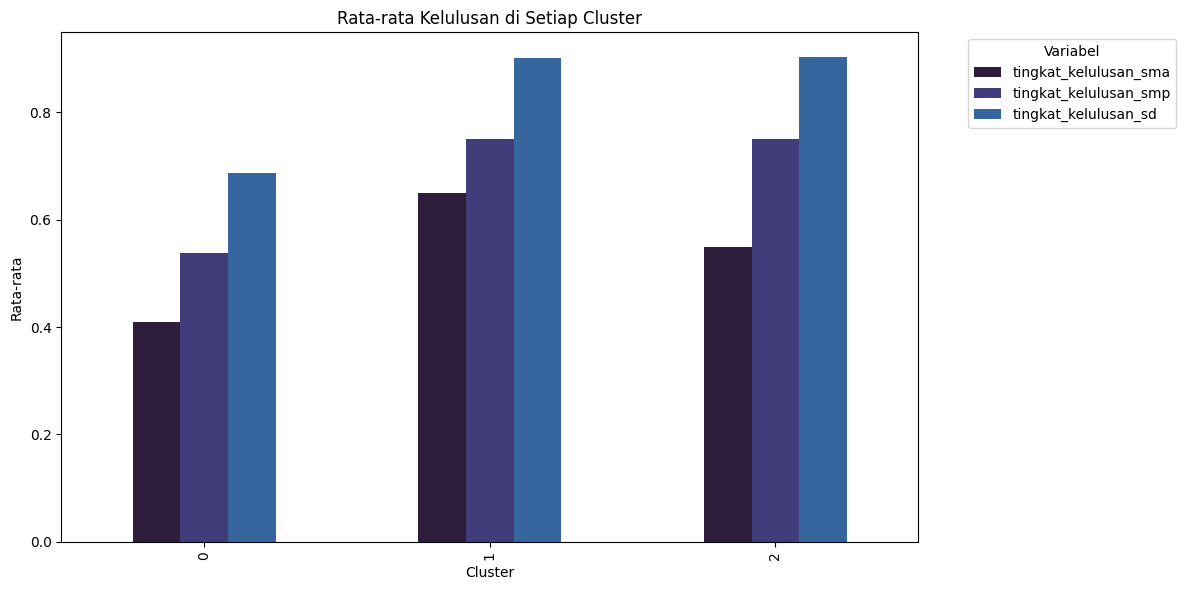

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("mako")

cols_pendidikan = ["tingkat_kelulusan_sma", "tingkat_kelulusan_smp", "tingkat_kelulusan_sd"]
cluster_analysis_kelulusan = df.groupby('Cluster')[cols_pendidikan].mean()

cluster_analysis_kelulusan.plot(kind='bar', figsize=(12, 6))

plt.title("Rata-rata Kelulusan di Setiap Cluster")
plt.ylabel("Rata-rata")
plt.xlabel("Cluster")
plt.legend(title="Variabel", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

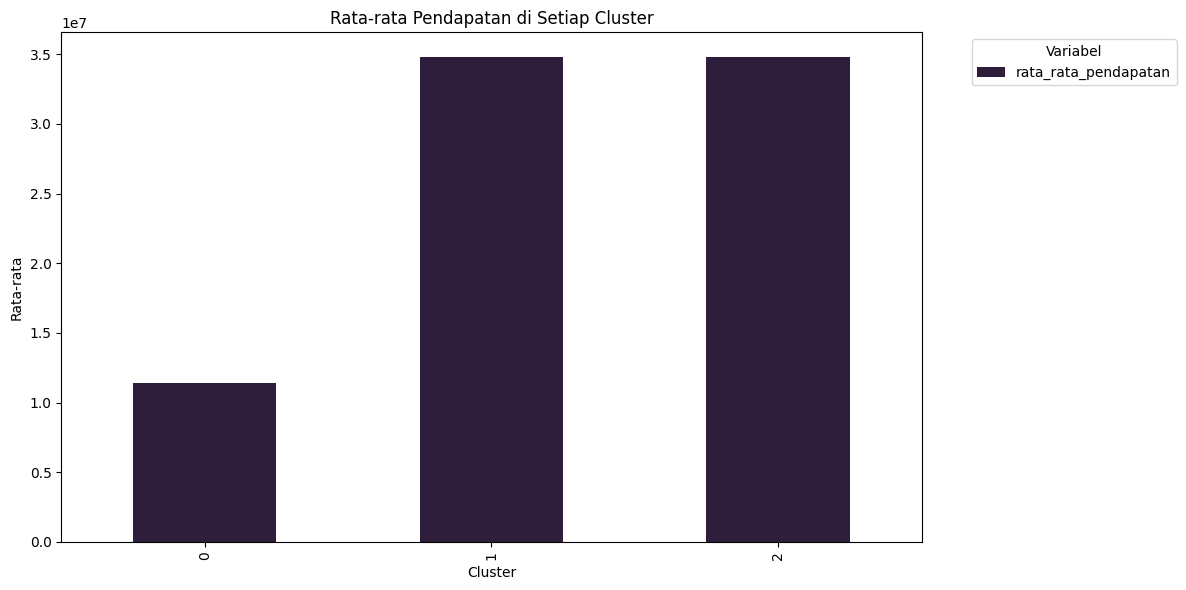

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("mako")

cluster_analysis_pendapatan = df.groupby('Cluster')["rata_rata_pendapatan"].mean()
cluster_analysis_pendapatan.plot(kind='bar', figsize=(12, 6))

plt.title("Rata-rata Pendapatan di Setiap Cluster")
plt.ylabel("Rata-rata")
plt.xlabel("Cluster")
plt.legend(title="Variabel", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

 ingin liat variabel apa yang paling berpengaruh dalam pembentukan clusternya

Feature Importance berdasarkan variasi antar cluster:
tingkat_kelulusan_sma    2.222770
laporan_kriminalitas     1.841378
tingkat_pengangguran     1.756894
dtype: float64


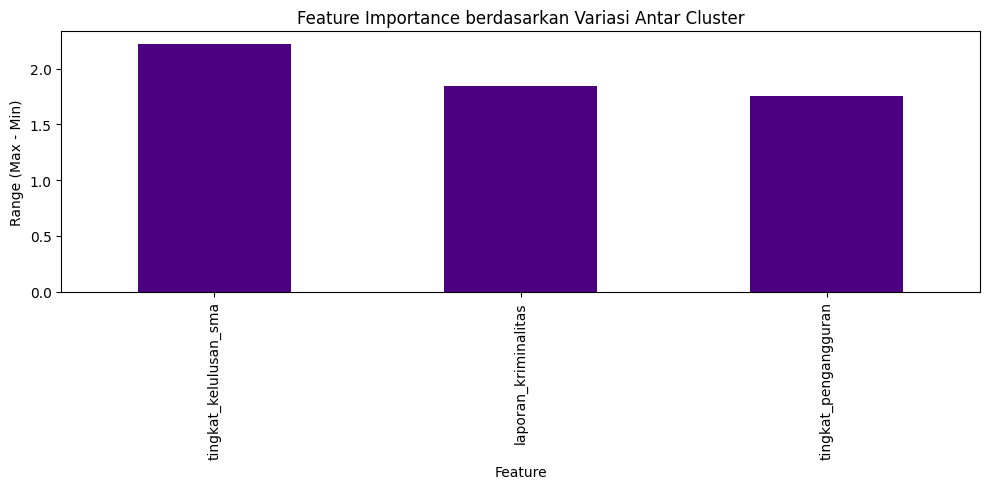

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

numerical_cols = ["laporan_kriminalitas", "tingkat_pengangguran", "tingkat_kelulusan_sma"]

scaled_numerical_cols = scaler.fit_transform(df[numerical_cols])
scaled_df = pd.DataFrame(scaled_numerical_cols, columns=numerical_cols)
scaled_df['Cluster'] = df['Cluster']
cluster_means = scaled_df.groupby('Cluster').mean()

feature_importance = cluster_means.max() - cluster_means.min()
feature_importance = feature_importance.sort_values(ascending=False)

print("Feature Importance berdasarkan variasi antar cluster:")
print(feature_importance)

feature_importance.plot(kind='bar', figsize=(10, 5), color='indigo')
plt.title("Feature Importance berdasarkan Variasi Antar Cluster")
plt.ylabel("Range (Max - Min)")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()


# K-means

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)
kmeans.fit(X)

centroids = kmeans.cluster_centers_
kmeans_labels = kmeans.labels_

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, kmeans_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.7581284072483873


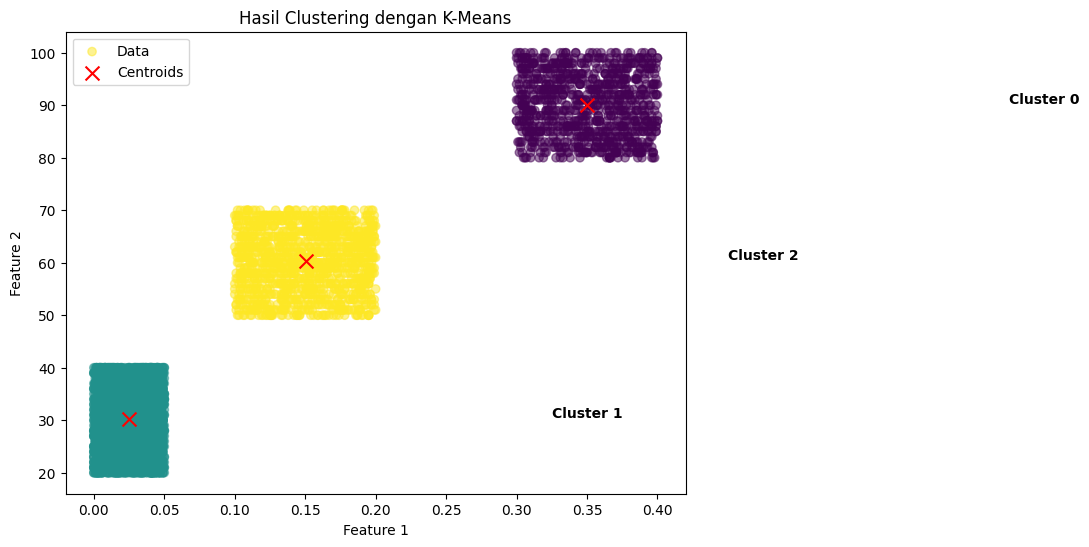

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', marker='o', alpha=0.5, label='Data')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')

for i, centroid in enumerate(centroids):
    plt.text(centroid[0] + 0.3, centroid[1] + 0.3,
             f"Cluster {i}",
             color='black', fontsize=10, weight='bold')

plt.legend()
plt.title("Hasil Clustering dengan K-Means")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()